# First Analysis

### Importing all needed packages

In [473]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time
from tqdm import tqdm 

### Mechanism to hidden some words from analysis.

In [474]:
# SHOW_USELESS_WORDS = True
SHOW_USELESS_WORDS = False

In [475]:
uselessWords = {
    'o', 'a', 'os', 'as', 
    'um', 'uma', 'uns', 'umas', 
    'e',
    'de', 'do', 'da',
    'sobre',
    'ma',
    'lo', 'la'
    'que',
    'se',
    'em',
    'com',
    'é',
    'que'
}
# uselessWords

### Loading into a dataframe the content of the dataset (CSV file)

In [476]:
rawDf = pd.read_csv( 
    './datasets/treated_csv_file.csv',
    encoding = 'UTF8',
    sep = ';');
rawDf.head()

,book_id,review_id,review_rating,review_title,review_text
0,8595081530,RM0NBXMBSU4M3,4,Um dos melhores livros sobre introdução ao con...,Sabe todos aqueles livros que ensinam você a c...
1,8595081530,R3KC0ZLPQX85LT,5,Livro excelente,Ensinamentos que eu tive quando li o livro:1. ...
2,8595081530,R2UADYH9X17S5V,4,Enriquecedor,"Sucinto livro de parábolas, O homem mais rico ..."
3,8595081530,RGJ6BAA0J8P77,5,Ótima leitura de fácil compreensão e ensinamen...,De forma clara traz ensinamentos sobre educaçã...
4,8595081530,RZ65FZEPU1Y8V,1,O livro O homem mais rico da Babilônia está fa...,O livro O homem mais rico da Babilônia está fa...


In [477]:
len(rawDf)

72777

### Some manipulation to the strings.

- lower case
- replace some symbols

In [478]:
df = rawDf['review_text'].str.lower()
df.head()

0    sabe todos aqueles livros que ensinam você a c...
1    ensinamentos que eu tive quando li o livro:1. ...
2    sucinto livro de parábolas, o homem mais rico ...
3    de forma clara traz ensinamentos sobre educaçã...
4    o livro o homem mais rico da babilônia está fa...
Name: review_text, dtype: object

In [479]:
df[1]

'ensinamentos que eu tive quando li o livro:1. primeiro pague a si mesmo e depois aos outros.“uma parte de todos os seus ganhos pertencem exclusivamente a você.”quando trabalhamos e recebemos o dinheiro, é essencial que peguemos uma parte para guardar. no livro se fala que se você ganha 10 moedas, você precisa guardar pelo menos uma. as outras 9 moedas você pode gastar. mas quando se diz em gastar, estão falando das coisas que realmente precisamos ter. gastar com necessidades, e não com desejos.precisamos gastar menos do que ganhamos.2. controle os seus gastos. muitas pessoas acham que o salário que ganham não é o suficiente para pagar as contas do mês, quem dirá conseguir guardar um dinheiro. por isso, precisamos saber exatamente no que gastamos. é necessário examinar cuidadosamente seu habitual modo de viver, para isso, é fundamental anotar as suas despesas, fazer um orçamento para saber o que é essencial é o que pode ser cortado.3. multiplique o seu dinheiro.depois que você consegui

In [480]:
def cleanWord( word ):
    
    word = word.replace(',', '')
    word = word.replace('.', '')
    word = word.replace('❤', '')
    word = word.replace('💜', '')

    return word

### Creating a list with all unique words to use further.

In [ ]:
# For time counting
startTime = time.time()

allWords = list()
words = list()

for review in df:
    
#     print(review)
    rawWords = str(review).split()
    
    for word in rawWords:
        word = cleanWord( word )
        
        if word not in words:
            words.append( word )

if not SHOW_USELESS_WORDS:
    
    for word in words:
        if word in uselessWords:
            continue
        else:
            allWords.append( word )
        
else: 
    allWords = words
    
# allWords

# For time counting
endTime = time.time()
elapsedTime = endTime - startTime
print( f'Running Time: {elapsedTime / 60} minutes' )

### Total of unique words.

In [ ]:
print( 'List size: {}'.format( len(allWords) ) )

### Build a word cloud with all unique words.

In [ ]:
allJoinedWords = " ".join( allWords ) + " "

if SHOW_USELESS_WORDS:

    wordcloud = WordCloud(
        width = 800, 
        height = 800,
        background_color ='white',
        min_font_size = 10
    ).generate( allJoinedWords )
    
else:
    
    wordcloud = WordCloud(
        width = 800, 
        height = 800,
        background_color ='white',
        stopwords = uselessWords,
        min_font_size = 12
    ).generate( allJoinedWords )

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Seeing the words and each total in a table way.

In [ ]:
allWordsDict = {}
for review in df:
    
    # print(review)
    
    words = str(review).split()
    # print(words)
    
    for word in words:
        
        if (not SHOW_USELESS_WORDS) and (word in uselessWords):
            continue
        
        word = cleanWord( word )
        
        if word not in allWordsDict.keys():
            
            allWordsDict[word] = 1
            
        else:
            
            allWordsDict[word] += 1

# print( allWordsDict )

In [ ]:
allWordsDF = pd.DataFrame()

allWordsDF[ 'word' ] = allWordsDict.keys()
allWordsDF[ 'count' ] = allWordsDict.values()

allWordsDF.head(10)

In [ ]:
allWordsDF.sort_values(
    by = 'count',
    ascending = 0)

# Second Analysis

#### Using Spacy and K-Means to analyze the tokens and try to group the contained sentences in each review.

#### Good tutorials and other texts

- Tutorial: Text Classification in Python Using spaCy
https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/

## Importing all needed packages

#### Command to install **spaCy** package: ***pip install spacy***

In [152]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time
import spacy
from tqdm import tqdm 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
import seaborn as sns

## Installing and loading the Portuguese pipeline.
#### To install Portuguese pipeline by command line, type: *python -m spacy download pt_core_news_lg*
#### See more on: https://spacy.io/models/pt#pt_core_news_lg


In [153]:
nlp = spacy.load('pt_core_news_lg') # https://spacy.io/models/pt#pt_core_news_lg

In [154]:
rawDf = pd.read_csv( 
    './datasets/treated_csv_file.csv',
    encoding = 'UTF8',
    sep = ';');
rawDf.head()

,book_id,review_id,review_rating,review_title,review_text
0,8595081530,RM0NBXMBSU4M3,4,Um dos melhores livros sobre introdução ao con...,Sabe todos aqueles livros que ensinam você a c...
1,8595081530,R3KC0ZLPQX85LT,5,Livro excelente,Ensinamentos que eu tive quando li o livro:1. ...
2,8595081530,R2UADYH9X17S5V,4,Enriquecedor,"Sucinto livro de parábolas, O homem mais rico ..."
3,8595081530,RGJ6BAA0J8P77,5,Ótima leitura de fácil compreensão e ensinamen...,De forma clara traz ensinamentos sobre educaçã...
4,8595081530,RZ65FZEPU1Y8V,1,O livro O homem mais rico da Babilônia está fa...,O livro O homem mais rico da Babilônia está fa...


In [155]:
df = rawDf
df.head()

,book_id,review_id,review_rating,review_title,review_text
0,8595081530,RM0NBXMBSU4M3,4,Um dos melhores livros sobre introdução ao con...,Sabe todos aqueles livros que ensinam você a c...
1,8595081530,R3KC0ZLPQX85LT,5,Livro excelente,Ensinamentos que eu tive quando li o livro:1. ...
2,8595081530,R2UADYH9X17S5V,4,Enriquecedor,"Sucinto livro de parábolas, O homem mais rico ..."
3,8595081530,RGJ6BAA0J8P77,5,Ótima leitura de fácil compreensão e ensinamen...,De forma clara traz ensinamentos sobre educaçã...
4,8595081530,RZ65FZEPU1Y8V,1,O livro O homem mais rico da Babilônia está fa...,O livro O homem mais rico da Babilônia está fa...


## Some values in the *review_text* column are *nan* so I changed the values to an empty string to avoid breaking the program when reading each item to extract the sentences.

One example:

|book_id|review_id|review_rating|review_title|review_text|
|:------|:------:|:------:|:------|:------:|
|8547000240|R1QX38W7D6QOQ4|5<!-- .element: style="text-align:center;" -->|livro maravilhoso, ainda estou acabando de ler mais posso afirma que e espetacular.|nan|

In [156]:
rawDf = pd.read_csv( 
    './datasets/treated_csv_file.csv',
    encoding = 'UTF8',
    sep = ';');
rawDf.head()

,book_id,review_id,review_rating,review_title,review_text
0,8595081530,RM0NBXMBSU4M3,4,Um dos melhores livros sobre introdução ao con...,Sabe todos aqueles livros que ensinam você a c...
1,8595081530,R3KC0ZLPQX85LT,5,Livro excelente,Ensinamentos que eu tive quando li o livro:1. ...
2,8595081530,R2UADYH9X17S5V,4,Enriquecedor,"Sucinto livro de parábolas, O homem mais rico ..."
3,8595081530,RGJ6BAA0J8P77,5,Ótima leitura de fácil compreensão e ensinamen...,De forma clara traz ensinamentos sobre educaçã...
4,8595081530,RZ65FZEPU1Y8V,1,O livro O homem mais rico da Babilônia está fa...,O livro O homem mais rico da Babilônia está fa...


In [157]:
df = rawDf
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72777 entries, 0 to 72776
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   book_id        72777 non-null  int64 
 1   review_id      72777 non-null  object
 2   review_rating  72777 non-null  object
 3   review_title   72700 non-null  object
 4   review_text    72774 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.8+ MB


In [158]:
df['review_text'] = df['review_text'].fillna('')

In [159]:
df['review_text'].isnull().values.any()

False

In [160]:
reviewPosition = 1

In [161]:
df.iloc[reviewPosition]

book_id                                                 8595081530
review_id                                           R3KC0ZLPQX85LT
review_rating                                                    5
review_title                                       Livro excelente
review_text      Ensinamentos que eu tive quando li o livro:1. ...
Name: 1, dtype: object

In [162]:
doc = nlp( u''.join(df.iloc[reviewPosition]['review_text']) )
doc

Ensinamentos que eu tive quando li o livro:1. Primeiro pague a si mesmo e depois aos outros.“Uma parte de todos os seus ganhos pertencem exclusivamente a você.”Quando trabalhamos e recebemos o dinheiro, é essencial que peguemos uma parte para guardar. No livro se fala que se você ganha 10 moedas, você precisa guardar pelo menos uma. As outras 9 moedas você pode gastar. Mas quando se diz em gastar, estão falando das coisas que realmente precisamos ter. Gastar com necessidades, e não com desejos.Precisamos gastar menos do que ganhamos.2. Controle os seus gastos. Muitas pessoas acham que o salário que ganham não é o suficiente para pagar as contas do mês, quem dirá conseguir guardar um dinheiro. Por isso, precisamos saber exatamente no que gastamos. É necessário examinar cuidadosamente seu habitual modo de viver, para isso, é fundamental anotar as suas despesas, fazer um orçamento para saber o que é essencial é o que pode ser cortado.3. Multiplique o seu dinheiro.Depois que você conseguir

In [163]:
totalTokensToPrint = 30

print( f'Printing the first {totalTokensToPrint}th tokens:\n' )

for token in doc[0:totalTokensToPrint]:
    print( f'{token.text:{15}} {spacy.explain(token.pos_):{30}} {token.lemma_:{15}}' )

Printing the first 30th tokens:

Ensinamentos    noun                           Ensinamentos   
que             pronoun                        que            
eu              pronoun                        eu             
tive            verb                           ter            
quando          adverb                         quando         
li              verb                           ler            
o               determiner                     o              
livro:1         proper noun                    livro:1        
.               punctuation                    .              
Primeiro        adverb                         Primeiro       
pague           verb                           pagar          
a               adposition                     o              
si              pronoun                        si             
mesmo           adverb                         mesmo          
e               coordinating conjunction       e              
depois          adverb

In [164]:
for sentence in doc.sents:
    
    print( f'{sentence}' )
    print( f'--- Sentence size: {len(sentence)}' )
    print()

Ensinamentos que eu tive quando li o livro:1.
--- Sentence size: 9

Primeiro pague a si mesmo e depois aos outros.
--- Sentence size: 10

“Uma parte de todos os seus ganhos pertencem exclusivamente a você.
--- Sentence size: 12

”Quando trabalhamos e recebemos o dinheiro, é essencial que peguemos uma parte para guardar.
--- Sentence size: 16

No livro se fala que se você ganha 10 moedas, você precisa guardar pelo menos uma.
--- Sentence size: 18

As outras 9 moedas você pode gastar.
--- Sentence size: 8

Mas quando se diz em gastar, estão falando das coisas que realmente precisamos ter.
--- Sentence size: 16

Gastar com necessidades, e não com desejos.
--- Sentence size: 9

Precisamos gastar menos do que ganhamos.2.
--- Sentence size: 7

Controle os seus gastos.
--- Sentence size: 5

Muitas pessoas acham que o salário que ganham não é o suficiente para pagar as contas do mês, quem dirá conseguir guardar um dinheiro.
--- Sentence size: 26

Por isso, precisamos saber exatamente no que ga

## Building a dataframe of sentences and building a new dataset of sentences.

In [165]:
# # totalReviews = 10
# # totalReviews = 10000
# # i = 0

# # For time counting
# startTime = time.time()

# csvFile = './datasets/sentences.csv'
# csvDF = pd.DataFrame(columns = [
#     'book_id', 
#     'review_id', 
#     'review_rating', 
#     # 'review_title', 
#     'sentence'
# ]) 

# # for index in tqdm( range(0, totalReviews), desc="Progress", ncols=100 ):
# for index in tqdm( range(0, len(df)), desc="Progress", ncols=100 ):
    
#     review = df.iloc[index]
        
#     # print( f"- Book ID: {review['book_id']}" )
#     # print( f"- Review ID: {review['review_id']}" )
#     # print( f"- Review Rating: {review['review_rating']}" )
#     # print( f"- Review Title: {review['review_title']}" )
#     # print( f"- Review Text: {review['review_text']}" )
#     # print()
    
#     doc = nlp( u''.join( review['review_text'] ) )
#     # print(doc[0])
#     # print()
    
#     # print( '- Sentences' )
#     # print()
    
#     for sentence in doc.sents:
    
#         # print( f'{sentence}' )
#         # print( f'--- Sentence size: {len(sentence)}' )
#         # print()
        
#         row = {
#             'book_id': review['book_id'],
#             'review_id': review['review_id'],
#             'review_rating': review['review_rating'],
#             # 'review_title': review['review_title'],
#             'sentence': sentence
#         }
#         csvDF.loc[ len(csvDF), csvDF.columns ] = row
        
#         # print(i)
#         # print( f"review_id: {review['review_id']}" )
#         # print(sentence)
#         # print()
        
#         # i = i + 1
    
#     # print('\n======================================= Another Review =======================================\n\n')
    
# csvDF.to_csv(
#     csvFile, 
#     encoding = 'utf-8', 
#     index = False,
#     sep=';'
# )
# # print( csvDF )

# print('======================================================================')
# print('Finished')

# # For time counting
# endTime = time.time()
# elapsedTime = endTime - startTime
# print( f'Running Time: {elapsedTime / 60} minutes' )

## Loading the sentences of the CSV file.

In [166]:
nlp = spacy.load('pt_core_news_lg') # https://spacy.io/models/pt#pt_core_news_lg

In [228]:
df = pd.read_csv( 
    './datasets/sentences.csv',
    encoding = 'UTF8',
    sep = ';');
df.head()

,book_id,review_id,review_rating,sentence
0,8595081530,RM0NBXMBSU4M3,4,Sabe todos aqueles livros que ensinam você a c...
1,8595081530,RM0NBXMBSU4M3,4,Ou daqueles que você termina a leitura sentind...
2,8595081530,RM0NBXMBSU4M3,4,"Você NÃO vai encontrar um setup milagroso, ou ..."
3,8595081530,RM0NBXMBSU4M3,4,Basicamente este livro conta verdades sobre o ...
4,8595081530,RM0NBXMBSU4M3,4,Mostra os detalhes de uma forma tão direta e b...


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176751 entries, 0 to 176750
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   book_id        176751 non-null  int64 
 1   review_id      176751 non-null  object
 2   review_rating  176751 non-null  int64 
 3   sentence       176750 non-null  object
dtypes: int64(2), object(2)
memory usage: 5.4+ MB


In [169]:
df.iloc[0]['sentence']

'Sabe todos aqueles livros que ensinam você a criar uma agenda para controle de gastos contendo tudo que você gasta durante determinado período de tempo e que você nunca consegue terminar o tal método?'

In [170]:
doc = nlp( df.iloc[0]['sentence'] )
tokens = [token.text for token in doc]
print(tokens)

['Sabe', 'todos', 'aqueles', 'livros', 'que', 'ensinam', 'você', 'a', 'criar', 'uma', 'agenda', 'para', 'controle', 'de', 'gastos', 'contendo', 'tudo', 'que', 'você', 'gasta', 'durante', 'determinado', 'período', 'de', 'tempo', 'e', 'que', 'você', 'nunca', 'consegue', 'terminar', 'o', 'tal', 'método', '?']


In [171]:
tokens = [token.lemma_ for token in doc]
print(tokens)

['Sabe', 'todo', 'aquele', 'livro', 'que', 'ensinar', 'você', 'o', 'criar', 'umar', 'agendar', 'parir', 'controlo', 'de', 'gasto', 'conter', 'tudo', 'que', 'você', 'gasto', 'durante', 'determinar', 'período', 'de', 'tempo', 'e', 'que', 'você', 'nunca', 'conseguir', 'terminar', 'o', 'tal', 'método', '?']


## Analysis of top sentences

In [230]:
df['sentence'].value_counts()

                                                                                1116
Muito bom                                                                        584
Recomendo.                                                                       561
!                                                                                514
Muito bom!                                                                       459
                                                                                ... 
Muito bom, fácil a leitura e bem diferente dos filmes hehehehe                     1
O Senhor do anéis completo.                                                        1
Gostei tanto que comprei em seguida o box                                          1
História muito cativante e divertida de se ler.                                    1
A poesia de  Amanda  é visceral ,intensa e tão próxima de todas as mulheres.       1
Name: sentence, Length: 138605, dtype: int64

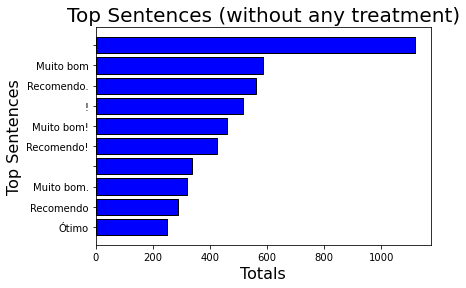

In [231]:
topSentencesLimit = 10
topSentences = df['sentence'].value_counts().index[ :topSentencesLimit ].tolist()[::-1] # [::-1] - Reverse the list
pos = np.arange( topSentencesLimit )
sentenceTotals = df['sentence'].value_counts().values[ :topSentencesLimit ].tolist()[::-1] # [::-1] - Reverse the list
 
plt.barh(
    pos,
    sentenceTotals,
    color='blue',
    edgecolor='black')
plt.yticks( pos, topSentences )
plt.xlabel( 'Totals', fontsize=16 )
plt.ylabel( 'Top Sentences', fontsize=16 )
plt.title( 'Top Sentences (without any treatment)', fontsize=20 )
plt.show()

In [374]:
def cleanSentence( sentence ):
    
    return str(sentence).lower().strip( ' .!\'️\'' )

In [232]:
# sentences = df['sentence'].value_counts().index[ :topSentencesLimit ].tolist()[::-1]
# cleanedSentences = [cleanSentence( sentence ) for sentence in sentences]
# cleanedSentences = [sentence for sentence in cleanedSentences if len(sentence) > 0 ]
# print( cleanedSentences )
# # print( len(cleanedSentences[3]) )
# # print( cleanedSentences[3] )
# # print( cleanedSentences[3].isspace() )
# # print( not cleanedSentences[3] )

In [375]:
sentences = df['sentence'].tolist()
# [print(sentence) for sentence in sentences]
cleanedSentences = [cleanSentence( sentence ) for sentence in sentences]
# cleanedSentences = [sentence for sentence in cleanedSentences if len(sentence) > 0 ]
dfTopSentences = df
dfTopSentences['sentence'] = cleanedSentences
dfTopSentences['sentence'].head()

0    sabe todos aqueles livros que ensinam você a c...
1    ou daqueles que você termina a leitura sentind...
2    você não vai encontrar um setup milagroso, ou ...
3    basicamente este livro conta verdades sobre o ...
4    mostra os detalhes de uma forma tão direta e b...
Name: sentence, dtype: object

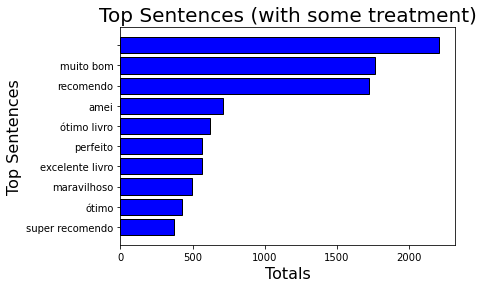

In [234]:
topSentencesLimit = 10
topSentences = dfTopSentences['sentence'].value_counts().index[ :topSentencesLimit ].tolist()[::-1] # [::-1] - Reverse the list
pos = np.arange( topSentencesLimit )
sentenceTotals = dfTopSentences['sentence'].value_counts().values[ :topSentencesLimit ].tolist()[::-1] # [::-1] - Reverse the list
 
plt.barh(
    pos,
    sentenceTotals,
    color='blue',
    edgecolor='black')
plt.yticks( pos, topSentences )
plt.xlabel( 'Totals', fontsize=16 )
plt.ylabel( 'Top Sentences', fontsize=16 )
plt.title( 'Top Sentences (with some treatment)', fontsize=20 )
plt.show()

### Repeated Sentences

In [344]:
total = len(dfTopSentences['sentence'])
values = dfTopSentences['sentence'].value_counts()[:total]
sentences = dfTopSentences['sentence'].value_counts()[:total].index

In [348]:
repeatedSentences = list()
for i in range(0, len(sentences)):
    # print( f'{sentence[i]} - {values[i]}' )
    if values[i] > 1:
        repeatedSentences.append( {
            'sentence': sentences[i],
            'value': values[i],
        } )

print( f'Total of results: { len(repeatedSentences) }' )
print( '--------------------------' )
print()

showTotal = 10
print( f'First {showTotal} results' )
print( '--------------------------' )
print()
for item in repeatedSentences[:showTotal]:
        
    print( f"{item['sentence']} - {item['value']}" )

print()
print( '===================================================' )
print()
    
print( f'Last {showTotal} results' )
print( '--------------------------' )
print()
for item in repeatedSentences[-showTotal:]:
        
    print( f"{item['sentence']} - {item['value']}" )

Total of results: 11241
--------------------------

First 10 results
--------------------------

 - 2211
muito bom - 1762
recomendo - 1724
amei - 710
ótimo livro - 618
perfeito - 567
excelente livro - 567
maravilhoso - 495
ótimo - 425
super recomendo - 374


Last 10 results
--------------------------

tal amor dá para ser sentido em cada palavra, cada detalhe - 2
fiz o pedido na sexta feira e chegou na segunda, muito rápido, bem embalado e tudo certinho - 2
encantador o livro, e com um toque de lição de vida também - 2
gostei bastante, já vou ler o terceiro - 2
um livro maravilhoso,que superou minhas expectativas eu não conseguia parar de ler ele - 2
recomendo todos os outros livros, este é o segundo - 2
história muito boa e envolvente - 2
livro chegou em perfeito estado.é - 2
adoro essa autora e principalmente essa coleção - 2
como minha mãe já havia me dado os outros faltou só este, aí comprei na amazon, ele só é maior que os outros mas ainda assim é lindo - 2


### Unique Sentences

In [349]:
uniqueSentences = list()
for i in range(0, len(sentences)):
    
    if values[i] == 1:
        uniqueSentences.append( {
            'sentence': sentences[i],
            'value': values[i],
        } )

print( f'Total of results: { len(uniqueSentences) }' )
print( '--------------------------' )
print()

showTotal = 10
print( f'First {showTotal} results' )
print( '--------------------------' )
print()
for item in uniqueSentences[:showTotal]:
        
    print( f"{item['sentence']} - {item['value']}" )

print()
print( '===================================================' )
print()
    
print( f'Last {showTotal} results' )
print( '--------------------------' )
print()
for item in uniqueSentences[-showTotal:]:
        
    print( f"{item['sentence']} - {item['value']}" )

Total of results: 121954
--------------------------

First 10 results
--------------------------

ótima história, um livro para quem gosta de aventuras, recomendo, muito bom, fantástico, - 1
obrigado j.k por nos ter agraciado com tamanha obra - 1
que edição linda,cada detalhe lindo que não tenho palavras ara descrever - 1
ai ele é maravilhoso, era o que eu mais queria, tô amando - 1
o livro mais lindo que já vi - 1
maravilhosamente lindo - 1
o livro é fantástico, mesmo para quem já tenha assistido os filmes, o prazer da leitura chega a ser tão grande quanto ver o filme - 1
primeiro livro que li na infância, foi com ele que criei o habito pela leitura - 1
minhas filhas e eu amamos - 1
capa dura muito bem feia, veio perfeito e rapido - 1


Last 10 results
--------------------------

com gravuras, poster e capa artística - 1
uma das versões mais lindas que já vi de uma obra - 1
a melhor edição do hobbit já feita em todos os sentidos - 1
produto de qualidade e história incrível - 1
produto

### A good question to future investigation:

**We can relate these top sentences with users? Maybe the top sentences belongs to the same group of people...**

**But we need to observe privacy before this...**

## Building a Bag of Words (BoW) with the words of the sentences.

#### Get only unique sentences to analyse

In [416]:
tempDf = df

In [417]:
tempDf['sentence'] = [cleanSentence(sentence) for sentence in tempDf['sentence']]

In [418]:
len(tempDf)

176751

In [419]:
uniqueSentencesList = [ item['sentence'] for item in uniqueSentences ]
# uniqueSentencesList

In [421]:
tempDf = tempDf[ tempDf[ 'sentence' ].isin(uniqueSentencesList) ]

In [422]:
len(tempDf)

121954

In [424]:
tempDf

,book_id,review_id,review_rating,sentence
0,8595081530,RM0NBXMBSU4M3,4,sabe todos aqueles livros que ensinam você a c...
1,8595081530,RM0NBXMBSU4M3,4,ou daqueles que você termina a leitura sentind...
2,8595081530,RM0NBXMBSU4M3,4,"você não vai encontrar um setup milagroso, ou ..."
3,8595081530,RM0NBXMBSU4M3,4,basicamente este livro conta verdades sobre o ...
4,8595081530,RM0NBXMBSU4M3,4,mostra os detalhes de uma forma tão direta e b...
...,...,...,...,...
176746,8544106595,RQUIEDP9RU8GN,5,"uma obra que toca nos seus maiores pesadelos,m..."
176747,8544106595,R28THF88K7GE5S,5,"leve,pesado,forte,suave,lindo,feio e todas as ..."
176748,8544106595,R28THF88K7GE5S,5,"lindo,lindo,lindo"
176749,8544106595,R28THF88K7GE5S,5,"amei,comi,bebi cada palavra"


#### Total of selected in partialDf

In [484]:
linesTotal = 5000

In [485]:
partialDf = tempDf.iloc[ :linesTotal ]

In [486]:
partialDf.head()

,book_id,review_id,review_rating,sentence
0,8595081530,RM0NBXMBSU4M3,4,sabe todos aqueles livros que ensinam você a c...
1,8595081530,RM0NBXMBSU4M3,4,ou daqueles que você termina a leitura sentind...
2,8595081530,RM0NBXMBSU4M3,4,"você não vai encontrar um setup milagroso, ou ..."
3,8595081530,RM0NBXMBSU4M3,4,basicamente este livro conta verdades sobre o ...
4,8595081530,RM0NBXMBSU4M3,4,mostra os detalhes de uma forma tão direta e b...


In [487]:
partialDf.tail()

,book_id,review_id,review_rating,sentence
6350,8501112518,R39GQ970D2HSIU,5,dá vontade de ler todo de uma veze quando acab...
6351,8501112518,R3P5OGD7UC1DC4,5,"amo demais os livros da collen,esse é um encan..."
6352,8501112518,ROZ538WF2GIMU,5,nossa que livro
6353,8501112518,ROZ538WF2GIMU,5,vc fica sem querer acreditar que vai acabar de...
6356,8501112518,R7MT3I12VZ7O,5,"livro simplesmente perfeito, amei a história, ..."


In [488]:
partialDf.shape

(5000, 4)

#### Disable warnings

In [489]:
import warnings
warnings.filterwarnings("ignore")

In [490]:
# for i in range(0, len(partialDf)):
    
#     item = partialDf.iloc[i]
    
#     # print(item)
    
#     doc = nlp( item['sentence'] )
#     tokens = [ token.lemma_ for token in doc ]
    
#     for token in tokens:
        
#         if token not in partialDf.columns:
#             partialDf[ token ] = 0

#         partialDf.iloc[ i ][ token ] = 1
#         # print(partialDf.iloc[ i ][ token ])

# partialDf.head()

In [491]:
def tokenizer( sentence ):
    
    # sentence = sentence.strip("!%'(),-.—“”●♥")
    sentence = sentence.replace("!", "")
    sentence = sentence.replace("%", "")
    sentence = sentence.replace("'", "")
    sentence = sentence.replace("(", "")
    sentence = sentence.replace(")", "")
    sentence = sentence.replace(",", "")
    sentence = sentence.replace("-", "")
    sentence = sentence.replace("—", "")
    sentence = sentence.replace("“", "")
    sentence = sentence.replace("”", "")
    sentence = sentence.replace("●", "")
    sentence = sentence.replace("♥", "")    
    sentence = sentence.replace(".", "")
    sentence = sentence.replace("4", "")
    sentence = sentence.replace("/", "")
    sentence = sentence.replace("03", "")
    sentence = sentence.replace("1", "")
    sentence = sentence.replace("10", "")
    sentence = sentence.replace("115", "")
    sentence = sentence.replace("12", "")
    
    doc = nlp( sentence )
    tokens = [token.lemma_ for token in doc]
    
    return tokens

### BoW - Sparse Matrix - Token Frequency

In [492]:
vectorizer = CountVectorizer(
    tokenizer=tokenizer,
    ngram_range=(1,1))
# X = vectorizer.fit_transform( partialDf['sentence'] )
# print( vectorizer.get_feature_names_out() )
# print( X.toarray() )

dfBowTokenFrequency = pd.DataFrame(
    data = vectorizer.fit_transform( partialDf['sentence'] ).toarray(),
    columns = vectorizer.get_feature_names())
dfBowTokenFrequency.head(20)

,,,#,&,*,+6,0,00,0000,00000,...,😭,😹,🙏,🤍,🤑,🤠,🤣,🤩,🥰,🥺
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### BoW - Sparse Matrix - Binary

In [493]:
vectorizer = CountVectorizer(
    tokenizer=tokenizer,
    ngram_range=(1,1),
    binary=True)
# X = vectorizer.fit_transform( partialDf['sentence'] )
# print( vectorizer.get_feature_names_out() )
# print( X.toarray() )

dfBowBinary = pd.DataFrame(
    data = vectorizer.fit_transform( partialDf['sentence'] ).toarray(),
    columns = vectorizer.get_feature_names())
dfBowBinary.head(20)

,,,#,&,*,+6,0,00,0000,00000,...,😭,😹,🙏,🤍,🤑,🤠,🤣,🤩,🥰,🥺
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### BoW - Sparse Matrix - TF-IDF

#### https://www.kaggle.com/code/k4puneet/countvectorizer-tfidf-tutorial/notebook

In [494]:
vectorizer = TfidfVectorizer( analyzer = tokenizer )

dfBowTFIDF = pd.DataFrame(
    data = vectorizer.fit_transform( partialDf['sentence'] ).toarray(),
    columns = vectorizer.get_feature_names())
dfBowTFIDF.head(20)

,,,#,&,*,+6,0,00,0000,00000,...,😭,😹,🙏,🤍,🤑,🤠,🤣,🤩,🥰,🥺
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Total of clusters

In [495]:
clustersTotal = 5

### Function: classReport

In [496]:
def classReport( columnLabel, clustersTotal ):

    for i in range(0, clustersTotal):

        print( '===========================================================================' )
        print( f'Representation: {columnLabel} - class: {i}' )
        print( '===========================================================================' )
        print()

        dfClass = partialDf[ partialDf[ columnLabel ] == i ]

        display( dfClass.head(10) )
        print()

        print( f'Sentences by score from class {i}' )
        print( '====================================' )
        print( dfClass[ 'review_rating' ].value_counts().sort_index( ascending=False ) )
        print()

        print( f'Examples from class {i}' )
        print( '====================================' )
        print()

        sentencesClass = dfClass['sentence'].sample(5)
        for sentence in sentencesClass:
            print( sentence )
            print()
            print( '-----------------------------------' )
            print()

        print( '###########################################################################' )
        print( '###########################################################################' )
        print( '###########################################################################' )
        print()

### K-Means - BoW - Sparse Matrix - Token Frequency

In [497]:
kmeans = KMeans(n_clusters=clustersTotal, random_state=0).fit( dfBowTokenFrequency )
kmeans

KMeans(n_clusters=5, random_state=0)

In [498]:
kmeans.labels_

array([0, 0, 2, ..., 1, 1, 3])

In [499]:
kmeans.cluster_centers_

array([[ 6.32183908e-02, -3.90312782e-18,  1.19262239e-18, ...,
         2.38524478e-18,  1.19262239e-18,  2.87356322e-03],
       [ 2.94715447e-02,  1.01626016e-03,  5.08130081e-04, ...,
         2.03252033e-03,  5.08130081e-04, -3.14418630e-18],
       [ 3.77142857e-02,  1.14285714e-03, -2.05998413e-18, ...,
        -4.11996826e-18,  5.71428571e-04, -2.05998413e-18],
       [ 8.10810811e-02, -3.90312782e-18,  1.93050193e-03, ...,
         1.73472348e-18,  8.67361738e-19,  8.67361738e-19],
       [ 2.79411765e-01,  2.94117647e-02,  1.62630326e-19, ...,
         3.25260652e-19,  1.62630326e-19,  1.62630326e-19]])

In [500]:
columnLabel = 'class__bow_token_frequency'

In [501]:
partialDf[columnLabel] = kmeans.labels_
partialDf.head()

,book_id,review_id,review_rating,sentence,class__bow_token_frequency
0,8595081530,RM0NBXMBSU4M3,4,sabe todos aqueles livros que ensinam você a c...,0
1,8595081530,RM0NBXMBSU4M3,4,ou daqueles que você termina a leitura sentind...,0
2,8595081530,RM0NBXMBSU4M3,4,"você não vai encontrar um setup milagroso, ou ...",2
3,8595081530,RM0NBXMBSU4M3,4,basicamente este livro conta verdades sobre o ...,2
4,8595081530,RM0NBXMBSU4M3,4,mostra os detalhes de uma forma tão direta e b...,3


In [502]:
partialDf[columnLabel].value_counts().sort_index()

0     696
1    1968
2    1750
3     518
4      68
Name: class__bow_token_frequency, dtype: int64

#### PCA

In [503]:
pcaBowTokenFrequency = PCA( n_components=2 )
principalComponentsBowTokenFrequency = pcaBowTokenFrequency.fit_transform( dfBowTokenFrequency )
# principalComponentsBowTokenFrequency
# type(principalComponentsBowTokenFrequency)

In [504]:
'''
array([[ 1.21904561e+00, -1.18886035e+00],
       [ 2.39121079e-01, -3.42411365e-01],
       [-1.36406682e-01,  6.55526438e-01],
'''

a = []
b = []
for item in principalComponentsBowTokenFrequency:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

<AxesSubplot:>

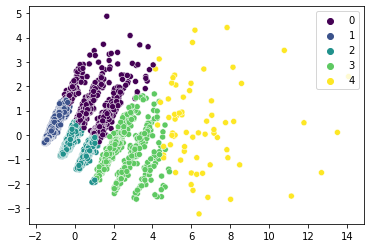

In [505]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

#### MDS

In [506]:
mds = MDS(n_components=2)
mds = mds.fit_transform( dfBowTokenFrequency )
mds.shape

(5000, 2)

In [507]:
a = []
b = []
for item in mds:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

<AxesSubplot:>

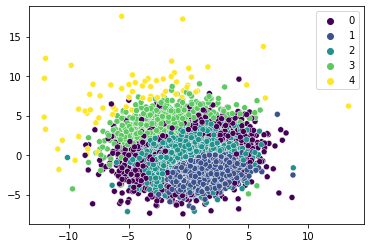

In [508]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

#### Class Report

In [509]:
classReport( columnLabel, clustersTotal )

Representation: class__bow_token_frequency - class: 0



,book_id,review_id,review_rating,sentence,class__bow_token_frequency
0,8595081530,RM0NBXMBSU4M3,4,sabe todos aqueles livros que ensinam você a c...,0
1,8595081530,RM0NBXMBSU4M3,4,ou daqueles que você termina a leitura sentind...,0
5,8595081530,RM0NBXMBSU4M3,4,só não ganha 5 estrelas pois acredito que a ar...,0
21,8595081530,R3KC0ZLPQX85LT,5,é necessário examinar cuidadosamente seu habit...,0
23,8595081530,R3KC0ZLPQX85LT,5,depois que você conseguir guardar o seu dinhei...,0
38,8595081530,R3KC0ZLPQX85LT,5,"em uma passagem do livro, se fala que não deve...",0
40,8595081530,R3KC0ZLPQX85LT,5,"temos que ter segurança, pois é isso que busca...",0
46,8595081530,R2UADYH9X17S5V,4,"sucinto livro de parábolas, o homem mais rico ...",0
48,8595081530,RGJ6BAA0J8P77,5,de forma clara traz ensinamentos sobre educaçã...,0
58,8595081530,R3O9BCBUG7LI29,5,"no inicio, achei que era só mais um livro de a...",0



Sentences by score from class 0
5    588
4     66
3     24
2     11
1      7
Name: review_rating, dtype: int64

Examples from class 0

é uma história de superação e de grande aprendizado para qualquer um

-----------------------------------

“a força de vontade não passa de um propósito inflexível para dar conta de uma tarefa a que você mesmo se obrigou

-----------------------------------

é claro que é um processo contínuo, e muitos livros poderão agregar

-----------------------------------

a leitura é de fácil compreensão, não é necessário conhecimento prévio para conseguir entender os conceitos ensinados

-----------------------------------

eu aprendi muita coisa que achei entender, e vejo que era só mais uma ignorante em relação a violência doméstica

-----------------------------------

###########################################################################
###########################################################################
########################################

,book_id,review_id,review_rating,sentence,class__bow_token_frequency
7,8595081530,RM0NBXMBSU4M3,4,gostei da textura do papel e da boa qualidade ...,1
15,8595081530,R3KC0ZLPQX85LT,5,"mas quando se diz em gastar, estão falando das...",1
16,8595081530,R3KC0ZLPQX85LT,5,"gastar com necessidades, e não com desejos",1
17,8595081530,R3KC0ZLPQX85LT,5,precisamos gastar menos do que ganhamos.2,1
26,8595081530,R3KC0ZLPQX85LT,5,"não adianta só poupar, devemos investir.4",1
29,8595081530,R3KC0ZLPQX85LT,5,devemos guardar uma parte do que ganhamos para...,1
30,8595081530,R3KC0ZLPQX85LT,5,não seja um procrastinador,1
31,8595081530,R3KC0ZLPQX85LT,5,devemos focar em nossos objetivos,1
32,8595081530,R3KC0ZLPQX85LT,5,"muitas pessoas querem ganhar dinheiro, porém, ...",1
42,8595081530,R3KC0ZLPQX85LT,5,sempre devemos buscar melhores resultados.8,1



Sentences by score from class 1
5    1742
4     120
3      44
2      28
1      34
Name: review_rating, dtype: int64

Examples from class 1

você nunca mais conseguirá superar esse livro

-----------------------------------

ótimo livro, chegou antes do prazo e tem uma qualidade incrível

-----------------------------------

nossa, sensacional

-----------------------------------

amei demaais!!!comprem, super indico e merece mais que 5 estrelas

-----------------------------------

todo mundo deveria ler esse livro para repensar seus atos

-----------------------------------

###########################################################################
###########################################################################
###########################################################################

Representation: class__bow_token_frequency - class: 2



,book_id,review_id,review_rating,sentence,class__bow_token_frequency
2,8595081530,RM0NBXMBSU4M3,4,"você não vai encontrar um setup milagroso, ou ...",2
3,8595081530,RM0NBXMBSU4M3,4,basicamente este livro conta verdades sobre o ...,2
9,8595081530,R3KC0ZLPQX85LT,5,ensinamentos que eu tive quando li o livro:1,2
10,8595081530,R3KC0ZLPQX85LT,5,primeiro pague a si mesmo e depois aos outros,2
11,8595081530,R3KC0ZLPQX85LT,5,“uma parte de todos os seus ganhos pertencem e...,2
12,8595081530,R3KC0ZLPQX85LT,5,"”quando trabalhamos e recebemos o dinheiro, é ...",2
13,8595081530,R3KC0ZLPQX85LT,5,"no livro se fala que se você ganha 10 moedas, ...",2
14,8595081530,R3KC0ZLPQX85LT,5,as outras 9 moedas você pode gastar,2
18,8595081530,R3KC0ZLPQX85LT,5,controle os seus gastos,2
20,8595081530,R3KC0ZLPQX85LT,5,"por isso, precisamos saber exatamente no que g...",2



Sentences by score from class 2
5    1496
4     142
3      50
2      19
1      43
Name: review_rating, dtype: int64

Examples from class 2

primeiro livro sobre finanças que leio e foi a escolha certa

-----------------------------------

traz reflexões necessárias sobre o tema

-----------------------------------

a cena da decisão de lily é a melhor de todas, perfeita

-----------------------------------

o lado feio do amor e assim que acaba empataram

-----------------------------------

o livro veio em perfeito estado,amei o livroooo

-----------------------------------

###########################################################################
###########################################################################
###########################################################################

Representation: class__bow_token_frequency - class: 3



,book_id,review_id,review_rating,sentence,class__bow_token_frequency
4,8595081530,RM0NBXMBSU4M3,4,mostra os detalhes de uma forma tão direta e b...,3
19,8595081530,R3KC0ZLPQX85LT,5,muitas pessoas acham que o salário que ganham ...,3
34,8595081530,R3KC0ZLPQX85LT,5,pessoas procrastinadoras deixam tudo para a úl...,3
37,8595081530,R3KC0ZLPQX85LT,5,é necessário saber aonde investir os seus frut...,3
45,8595081530,R3KC0ZLPQX85LT,5,devemos sempre nos aperfeiçoar e aprender com ...,3
47,8595081530,R2UADYH9X17S5V,4,embora tenha alguns conceitos hoje contestados...,3
53,8595081530,R2CMLSZODT5PMM,4,o livro traz lições importantes como:-busque c...,3
69,8595081530,R17E1E7TALNLBD,5,"segundo o autor, o propósito é justamente ofer...",3
79,8595081530,R17E1E7TALNLBD,5,"após a contextualização da história, o livro i...",3
83,8595081530,R17E1E7TALNLBD,5,arkad ainda acrescenta que se deve guardar no ...,3



Sentences by score from class 3
5    423
4     57
3     26
2      4
1      8
Name: review_rating, dtype: int64

Examples from class 3

a escrita é muito fluida, devorei as páginas e mal notei o tempo passar

-----------------------------------

o livro é muito bom, o começo é meio cansadinho, mas do meio para o final é simplesmente muito gostoso de ler e dar pra sentir todas as emoções dos personagens

-----------------------------------

principalmente para quem está em uma situação financeira ruin, os princípios que passa no livro é muito top, graças a deus consegui ter acesso a um conteúdo desse, sem falar da entrega...) chegou em 4 dias

-----------------------------------

livro prático e seguindo os passos você realmente começa a ter domínio sobre o ouro, dinheiro

-----------------------------------

o livro passa uma visão bem concreta sob a acumulação de riquezas e suas leis, e, para isso, o autor se utiliza do contexto babilônico

-----------------------------------

#######

,book_id,review_id,review_rating,sentence,class__bow_token_frequency
75,8595081530,R17E1E7TALNLBD,5,as idéias principais do livro são:1.de cada de...,4
96,8595081530,R17E1E7TALNLBD,5,e não se deixe enganar sob o romantismo de enr...,4
132,8595081530,R17E1E7TALNLBD,5,do capítulo 7 sobre as muralhas da babilônia p...,4
143,8595081530,R3RAD7COFBOKEM,5,"e no centro dessa roda, um grande sábio conta ...",4
172,8595081530,RTZKT8JX3Z4VU,4,talvez o único defeito seja a falta de demonst...,4
181,8595081530,R2RSPLKPAOZNY9,4,para quem é estudioso da área de economia o li...,4
286,8595081530,RRCYLO20S6TXC,5,com os textos ainda é possível retirar ensinam...,4
311,8595081530,R13SEBSQC51FLU,5,o fato é que se você tiver uma mentalidade de ...,4
355,8595081530,RQETXCD4BD91V,5,o livro trata de como vc deve passar a pensar ...,4
360,8595081530,R1XOI1FIMVBXT7,5,aborda basicamente a importância de se poupar ...,4



Sentences by score from class 4
5    59
4     5
3     2
2     1
1     1
Name: review_rating, dtype: int64

Examples from class 4

a maneira como a collen faz com que a gente se prenda a história é fantástico, o jeito que você se apaixona junto com a personagem e o jeito como você se decepciona, mesmo que não tenha passado por tal situação você sofre como se fosse com você, eu realmente me senti traída,

-----------------------------------

o homem mais rico da babilônia é um livro 2x1, além dos conceitos do dinheiro que foram usados na época desse grande império e podem ser utilizados até hoje, ele é um livro de storyteling muito envolvente aonde os conceitos são passados assim como numa conversa de mesa entre amigos e familiares, recomendo esse livro pra todas as idades

-----------------------------------

sempre ouvi boatos de que os livros que tratavam de números eram frios, poucos poéticos e sem uma contextualização, que a matemática estava dissociada da realidade e consistia num

### K-Means - BoW - Sparse Matrix - Binary

In [510]:
kmeans = KMeans(n_clusters=clustersTotal, random_state=0).fit( dfBowBinary )
kmeans

KMeans(n_clusters=5, random_state=0)

In [511]:
kmeans.labels_

array([2, 1, 2, ..., 3, 4, 3])

In [512]:
kmeans.cluster_centers_

array([[ 6.27615063e-02,  1.39470014e-03,  1.24683250e-18, ...,
        -1.30104261e-18,  1.24683250e-18,  1.39470014e-03],
       [ 3.31658291e-02,  1.00502513e-03,  1.00502513e-03, ...,
        -5.42101086e-19,  1.00502513e-03,  7.58941521e-19],
       [ 4.44444444e-02,  1.16959064e-03,  8.13151629e-19, ...,
        -3.25260652e-19,  8.13151629e-19,  4.06575815e-19],
       [ 3.54978355e-02, -8.67361738e-19,  2.16840434e-19, ...,
         1.08420217e-18,  2.16840434e-19,  1.08420217e-19],
       [ 2.58215962e-02,  1.56494523e-03,  7.82472613e-04, ...,
         2.34741784e-03,  7.82472613e-04,  4.06575815e-19]])

In [513]:
columnLabel = 'class__bow_binary'

In [514]:
partialDf[columnLabel] = kmeans.labels_
partialDf.head()

,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary
0,8595081530,RM0NBXMBSU4M3,4,sabe todos aqueles livros que ensinam você a c...,0,2
1,8595081530,RM0NBXMBSU4M3,4,ou daqueles que você termina a leitura sentind...,0,1
2,8595081530,RM0NBXMBSU4M3,4,"você não vai encontrar um setup milagroso, ou ...",2,2
3,8595081530,RM0NBXMBSU4M3,4,basicamente este livro conta verdades sobre o ...,2,3
4,8595081530,RM0NBXMBSU4M3,4,mostra os detalhes de uma forma tão direta e b...,3,2


In [515]:
partialDf[columnLabel].value_counts().sort_index()

0     717
1     995
2     855
3    1155
4    1278
Name: class__bow_binary, dtype: int64

#### PCA

In [516]:
pcaBowBinary = PCA( n_components=2 )
principalComponentsBowBinary = pcaBowBinary.fit_transform( dfBowBinary )
# principalComponentsBowBinary
# type(principalComponentsBowBinary)

In [517]:
'''
array([[ 1.21904561e+00, -1.18886035e+00],
       [ 2.39121079e-01, -3.42411365e-01],
       [-1.36406682e-01,  6.55526438e-01],
'''

a = []
b = []
for item in principalComponentsBowBinary:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

<AxesSubplot:>

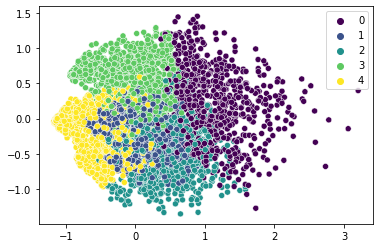

In [518]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

#### MDS

In [519]:
mds = MDS(n_components=2)
mds = mds.fit_transform( dfBowBinary )
mds.shape

(5000, 2)

In [520]:
a = []
b = []
for item in mds:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

<AxesSubplot:>

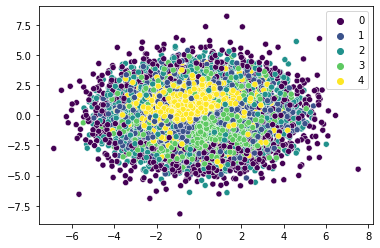

In [521]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

#### Class Report

In [522]:
classReport( columnLabel, clustersTotal )

Representation: class__bow_binary - class: 0



,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary
5,8595081530,RM0NBXMBSU4M3,4,só não ganha 5 estrelas pois acredito que a ar...,0,0
19,8595081530,R3KC0ZLPQX85LT,5,muitas pessoas acham que o salário que ganham ...,3,0
34,8595081530,R3KC0ZLPQX85LT,5,pessoas procrastinadoras deixam tudo para a úl...,3,0
45,8595081530,R3KC0ZLPQX85LT,5,devemos sempre nos aperfeiçoar e aprender com ...,3,0
46,8595081530,R2UADYH9X17S5V,4,"sucinto livro de parábolas, o homem mais rico ...",0,0
58,8595081530,R3O9BCBUG7LI29,5,"no inicio, achei que era só mais um livro de a...",0,0
59,8595081530,R3O9BCBUG7LI29,5,o livro é da década de 1920 e não tem a pegada...,0,0
63,8595081530,R3O9BCBUG7LI29,5,se você já consegue poupar seu dinheiro ou já ...,1,0
65,8595081530,R102K5ZA97V7VT,3,"bom livro, nada excepcional, é um livro de min...",0,0
66,8595081530,R102K5ZA97V7VT,3,é um bom livro pra quem ta pensando em começar...,0,0



Sentences by score from class 0
5    603
4     70
3     32
2      5
1      7
Name: review_rating, dtype: int64

Examples from class 0

achei que a escritora foi bem sucedida ao falar de assuntos  sérios e polêmicos, contudo, a história do romance em si acabou sendo meio clichê e previsível, não achei o final chocante e alguns momentos achei as personagens muito distantes da realidade

-----------------------------------

foi o livro mais intenso que eu já li

-----------------------------------

esse livro me tocou muito como pessoa e como mulher, sei que ainda sou adolescente (tenho 15)

-----------------------------------

um dos livros que mais mexeram cmg, por ter passado por situações parecidas ler a convivência deles foi surreal

-----------------------------------

sendo bem sincero, eu já levava alguns ensinamentos do livro ao extremo, mas foi uma leitura agradabilíssima, simples, acessível para gente leiga e esclarecida, trouxe boas lições além de ensinar um pouco de história

,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary
1,8595081530,RM0NBXMBSU4M3,4,ou daqueles que você termina a leitura sentind...,0,1
10,8595081530,R3KC0ZLPQX85LT,5,primeiro pague a si mesmo e depois aos outros,2,1
12,8595081530,R3KC0ZLPQX85LT,5,"”quando trabalhamos e recebemos o dinheiro, é ...",2,1
14,8595081530,R3KC0ZLPQX85LT,5,as outras 9 moedas você pode gastar,2,1
18,8595081530,R3KC0ZLPQX85LT,5,controle os seus gastos,2,1
20,8595081530,R3KC0ZLPQX85LT,5,"por isso, precisamos saber exatamente no que g...",2,1
22,8595081530,R3KC0ZLPQX85LT,5,multiplique o seu dinheiro,2,1
24,8595081530,R3KC0ZLPQX85LT,5,"é importante investir o seu dinheiro, não deix...",2,1
25,8595081530,R3KC0ZLPQX85LT,5,pegue suas economias para que elas possam lhe ...,2,1
27,8595081530,R3KC0ZLPQX85LT,5,assegure uma renda para o futuro,2,1



Sentences by score from class 1
5    858
4     81
3     25
2     12
1     19
Name: review_rating, dtype: int64

Examples from class 1

como sempre o pedido chegou antes do previsto, e em perfeito estado

-----------------------------------

quando você lê e vê o narrador falando sobre a antigamente, você se pergunta, o que séculos atrás tem haver com o que vivemos hoje?

-----------------------------------

recomendo a todos que se encontrem em situações similares a minha, recomendarei a todos que vierem me perguntar sobre assuntos relacionados ao tema

-----------------------------------

estude, pesquise, pense em coisas novas para alcançar o seu objetivo

-----------------------------------

acho que até crianças podem ler devido a escrita fluída

-----------------------------------

###########################################################################
###########################################################################
#################################################

,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary
0,8595081530,RM0NBXMBSU4M3,4,sabe todos aqueles livros que ensinam você a c...,0,2
2,8595081530,RM0NBXMBSU4M3,4,"você não vai encontrar um setup milagroso, ou ...",2,2
4,8595081530,RM0NBXMBSU4M3,4,mostra os detalhes de uma forma tão direta e b...,3,2
11,8595081530,R3KC0ZLPQX85LT,5,“uma parte de todos os seus ganhos pertencem e...,2,2
21,8595081530,R3KC0ZLPQX85LT,5,é necessário examinar cuidadosamente seu habit...,0,2
23,8595081530,R3KC0ZLPQX85LT,5,depois que você conseguir guardar o seu dinhei...,0,2
29,8595081530,R3KC0ZLPQX85LT,5,devemos guardar uma parte do que ganhamos para...,1,2
35,8595081530,R3KC0ZLPQX85LT,5,“os homens de ação são favorecidos pela deusa ...,2,2
40,8595081530,R3KC0ZLPQX85LT,5,"temos que ter segurança, pois é isso que busca...",0,2
48,8595081530,RGJ6BAA0J8P77,5,de forma clara traz ensinamentos sobre educaçã...,0,2



Sentences by score from class 2
5    733
4     66
3     26
2     12
1     18
Name: review_rating, dtype: int64

Examples from class 2

sim! existem preceitos fundamentais que de uma forma ou de outra em algum momento de nossas vidas ouvimos

-----------------------------------

ele nos trás ensinamentos sobre finanças através de parábolas pelos moradores de babilônia

-----------------------------------

eu tive todos os tipos de emoções nesse livro: felicidade, raiva, tristeza e alívio

-----------------------------------

simples e com muitos ensinamentos de economia básica

-----------------------------------

a entrega foi efetuada de forma eficiente e livro

-----------------------------------

###########################################################################
###########################################################################
###########################################################################

Representation: class__bow_binary - class: 3



,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary
3,8595081530,RM0NBXMBSU4M3,4,basicamente este livro conta verdades sobre o ...,2,3
9,8595081530,R3KC0ZLPQX85LT,5,ensinamentos que eu tive quando li o livro:1,2,3
13,8595081530,R3KC0ZLPQX85LT,5,"no livro se fala que se você ganha 10 moedas, ...",2,3
38,8595081530,R3KC0ZLPQX85LT,5,"em uma passagem do livro, se fala que não deve...",0,3
56,8595081530,R3O9BCBUG7LI29,5,livro proveitoso e de fácil leitura,1,3
62,8595081530,R3O9BCBUG7LI29,5,recomendo o livro com uma primeira leitura no ...,2,3
64,8595081530,R3O9BCBUG7LI29,5,o livro chegou sem nenhum problema e foi entre...,2,3
70,8595081530,R17E1E7TALNLBD,5,ele já inicia o livro citando o seguinte sobre...,2,3
78,8595081530,R17E1E7TALNLBD,5,t. harv eker (deixei lá uma resenha bem comple...,2,3
147,8595081530,R3RAD7COFBOKEM,5,● e aí eu encontro esse livro,1,3



Sentences by score from class 3
5    985
4    105
3     28
2     15
1     22
Name: review_rating, dtype: int64

Examples from class 3

por isso demorei para terminar mesmo sendo um livro pequenininho

-----------------------------------

livro com uma leitura gostosa e rápida

-----------------------------------

me parece bom, eu ainda não pude ler, mas já ouvi falar muito bem desse livro

-----------------------------------

melhor livro que já li,muitos insights

-----------------------------------

livro com diversos ensinamentos de finanças pessoais contados de modo diferente, por meio de histórias de personagens da babilônia

-----------------------------------

###########################################################################
###########################################################################
###########################################################################

Representation: class__bow_binary - class: 4



,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary
7,8595081530,RM0NBXMBSU4M3,4,gostei da textura do papel e da boa qualidade ...,1,4
15,8595081530,R3KC0ZLPQX85LT,5,"mas quando se diz em gastar, estão falando das...",1,4
16,8595081530,R3KC0ZLPQX85LT,5,"gastar com necessidades, e não com desejos",1,4
17,8595081530,R3KC0ZLPQX85LT,5,precisamos gastar menos do que ganhamos.2,1,4
26,8595081530,R3KC0ZLPQX85LT,5,"não adianta só poupar, devemos investir.4",1,4
30,8595081530,R3KC0ZLPQX85LT,5,não seja um procrastinador,1,4
31,8595081530,R3KC0ZLPQX85LT,5,devemos focar em nossos objetivos,1,4
32,8595081530,R3KC0ZLPQX85LT,5,"muitas pessoas querem ganhar dinheiro, porém, ...",1,4
42,8595081530,R3KC0ZLPQX85LT,5,sempre devemos buscar melhores resultados.8,1,4
43,8595081530,R3KC0ZLPQX85LT,5,ninguém é dono de todo conhecimento,1,4



Sentences by score from class 4
5    1129
4      68
3      35
2      19
1      27
Name: review_rating, dtype: int64

Examples from class 4

ou cm

-----------------------------------

amei, leitura rápida, envolvente, protagonista forte, linda

-----------------------------------

leiam quando estiverem bem, podem ter gatilhos

-----------------------------------

uso como organização financeira

-----------------------------------

terminei em 1 semana mas poderia sem em menos se eu nao estivesse com outros livros em andamento

-----------------------------------

###########################################################################
###########################################################################
###########################################################################



### K-Means - BoW - Sparse Matrix - TF-IDF

In [523]:
kmeans = KMeans(n_clusters=clustersTotal, random_state=0).fit( dfBowTFIDF )
kmeans

KMeans(n_clusters=5, random_state=0)

In [524]:
kmeans.labels_

array([2, 2, 0, ..., 2, 0, 2])

In [525]:
kmeans.cluster_centers_

array([[ 8.39045723e-03,  8.39116207e-04,  2.57720789e-04, ...,
         1.07070285e-03,  3.18105317e-04,  9.21571847e-19],
       [ 1.00242963e-02, -3.25260652e-19,  2.16840434e-19, ...,
         2.71050543e-19, -4.87890978e-19,  0.00000000e+00],
       [ 9.00104340e-03,  2.15554211e-04,  1.78855286e-04, ...,
         1.19262239e-18, -5.14996032e-19,  4.05838952e-04],
       [ 1.65670622e-02, -3.79470760e-19,  1.89735380e-19, ...,
         5.42101086e-19, -3.79470760e-19,  0.00000000e+00],
       [ 1.17531601e-02, -5.42101086e-20,  2.71050543e-19, ...,
         1.62630326e-19,  6.04919142e-04,  2.71050543e-20]])

In [526]:
columnLabel = 'class__bow_tfidf'

In [527]:
partialDf[columnLabel] = kmeans.labels_
partialDf.head()

,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary,class__bow_tfidf
0,8595081530,RM0NBXMBSU4M3,4,sabe todos aqueles livros que ensinam você a c...,0,2,2
1,8595081530,RM0NBXMBSU4M3,4,ou daqueles que você termina a leitura sentind...,0,1,2
2,8595081530,RM0NBXMBSU4M3,4,"você não vai encontrar um setup milagroso, ou ...",2,2,0
3,8595081530,RM0NBXMBSU4M3,4,basicamente este livro conta verdades sobre o ...,2,3,0
4,8595081530,RM0NBXMBSU4M3,4,mostra os detalhes de uma forma tão direta e b...,3,2,2


In [528]:
partialDf[columnLabel].value_counts().sort_index()

0    2170
1     391
2    1670
3     295
4     474
Name: class__bow_tfidf, dtype: int64

#### PCA

In [529]:
pca = PCA( n_components=2 )
principalComponents = pca.fit_transform( dfBowTFIDF )

In [530]:
'''
array([[ 1.21904561e+00, -1.18886035e+00],
       [ 2.39121079e-01, -3.42411365e-01],
       [-1.36406682e-01,  6.55526438e-01],
'''

a = []
b = []
for item in principalComponents:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

<AxesSubplot:>

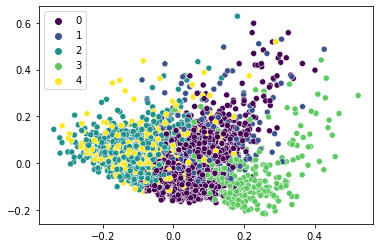

In [531]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

#### MDS

In [532]:
mds = MDS(n_components=2)
mds = mds.fit_transform( dfBowTFIDF )
mds.shape

(5000, 2)

In [533]:
a = []
b = []
for item in mds:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

<AxesSubplot:>

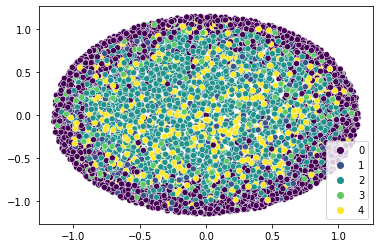

In [534]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

#### Class Report

In [535]:
classReport( columnLabel, clustersTotal )

Representation: class__bow_tfidf - class: 0



,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary,class__bow_tfidf
2,8595081530,RM0NBXMBSU4M3,4,"você não vai encontrar um setup milagroso, ou ...",2,2,0
3,8595081530,RM0NBXMBSU4M3,4,basicamente este livro conta verdades sobre o ...,2,3,0
7,8595081530,RM0NBXMBSU4M3,4,gostei da textura do papel e da boa qualidade ...,1,4,0
10,8595081530,R3KC0ZLPQX85LT,5,primeiro pague a si mesmo e depois aos outros,2,1,0
14,8595081530,R3KC0ZLPQX85LT,5,as outras 9 moedas você pode gastar,2,1,0
15,8595081530,R3KC0ZLPQX85LT,5,"mas quando se diz em gastar, estão falando das...",1,4,0
16,8595081530,R3KC0ZLPQX85LT,5,"gastar com necessidades, e não com desejos",1,4,0
17,8595081530,R3KC0ZLPQX85LT,5,precisamos gastar menos do que ganhamos.2,1,4,0
18,8595081530,R3KC0ZLPQX85LT,5,controle os seus gastos,2,1,0
25,8595081530,R3KC0ZLPQX85LT,5,pegue suas economias para que elas possam lhe ...,2,1,0



Sentences by score from class 0
5    1845
4     169
3      65
2      42
1      49
Name: review_rating, dtype: int64

Examples from class 0

leitura que traz soluções sábias e muito atuais para evitar a falta de dinheiro, não desperdiçar recursos durante tempos de opulência, buscar conhecimento e informação em vez de apenas lucro

-----------------------------------

nada surpreendente

-----------------------------------

bom e importante para quem está iniciando e quer aprender sobre o assunto

-----------------------------------

sobre um ponto que acho um pouco injusto não posso falar para não dar spoiler

-----------------------------------

chorei igual uma vaca velha kkkkkkk

-----------------------------------

###########################################################################
###########################################################################
###########################################################################

Representation: class__bow_tfidf - class: 

,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary,class__bow_tfidf
49,8595081530,RGJ6BAA0J8P77,5,leitura fácil mas com conteúdo profundo para r...,2,1,1
55,8595081530,R2CMLSZODT5PMM,4,vale a leitura do inicio ao fim,2,1,1
56,8595081530,R3O9BCBUG7LI29,5,livro proveitoso e de fácil leitura,1,3,1
62,8595081530,R3O9BCBUG7LI29,5,recomendo o livro com uma primeira leitura no ...,2,3,1
167,8595081530,RTZKT8JX3Z4VU,4,não é uma leitura muito fácil e não se culpe s...,1,4,1
275,8595081530,R2HGKL55GX54JT,3,para quem não tem o hábito da leitura do últim...,2,1,1
325,8595081530,RHX4DZRH7EGGV,5,"recomendo a leitura, que é leve e enriquecedora",2,1,1
334,8595081530,R36HAB2R9FS3U8,5,o livro tem uma leitura fácil e que vai nos en...,2,3,1
339,8595081530,R36HAB2R9FS3U8,5,"e, quem diria, hoje eu sou mais um a citar e r...",0,0,1
341,8595081530,R1MA3SNSU9TXXF,5,quando alguém vem me perguntar e demonstra int...,2,1,1



Sentences by score from class 1
5    348
4     33
3      8
2      1
1      1
Name: review_rating, dtype: int64

Examples from class 1

uma leitura muito fluída e fácil de ser feita

-----------------------------------

boa leitura, ensinamentos e que se aplica para o nosso dia -

-----------------------------------

para quem não tem o hábito da leitura do último, recomendo o homem mais rico

-----------------------------------

simples e objetivo, leitura super agradável e com insights maravilhosos

-----------------------------------

a leitura é de fácil compreensão, não é necessário conhecimento prévio para conseguir entender os conceitos ensinados

-----------------------------------

###########################################################################
###########################################################################
###########################################################################

Representation: class__bow_tfidf - class: 2



,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary,class__bow_tfidf
0,8595081530,RM0NBXMBSU4M3,4,sabe todos aqueles livros que ensinam você a c...,0,2,2
1,8595081530,RM0NBXMBSU4M3,4,ou daqueles que você termina a leitura sentind...,0,1,2
4,8595081530,RM0NBXMBSU4M3,4,mostra os detalhes de uma forma tão direta e b...,3,2,2
5,8595081530,RM0NBXMBSU4M3,4,só não ganha 5 estrelas pois acredito que a ar...,0,0,2
11,8595081530,R3KC0ZLPQX85LT,5,“uma parte de todos os seus ganhos pertencem e...,2,2,2
12,8595081530,R3KC0ZLPQX85LT,5,"”quando trabalhamos e recebemos o dinheiro, é ...",2,1,2
13,8595081530,R3KC0ZLPQX85LT,5,"no livro se fala que se você ganha 10 moedas, ...",2,3,2
19,8595081530,R3KC0ZLPQX85LT,5,muitas pessoas acham que o salário que ganham ...,3,0,2
20,8595081530,R3KC0ZLPQX85LT,5,"por isso, precisamos saber exatamente no que g...",2,1,2
21,8595081530,R3KC0ZLPQX85LT,5,é necessário examinar cuidadosamente seu habit...,0,2,2



Sentences by score from class 2
5    1411
4     152
3      57
2      16
1      34
Name: review_rating, dtype: int64

Examples from class 2

o livro aborda o que é preciso para se alcançar uma vida financeira saudável e próspera, com apenas algumas mudanças comportamentais e possivelmente alcançáveis

-----------------------------------

ele foi tão bem construído, a escrita da collen é incrível, você consegue ter um vínculo com os personagens e isso faz você sentir a proposta do livro na pele

-----------------------------------

mas o fato é que, terminei em um dia e estou aqui, em lágrimas, em uma mistura de sentimentos que eu não sei explicar

-----------------------------------

primeiro livro do meu ano, pra quem deseja mudar a vida financeira esse é o caminho

-----------------------------------

princípios muito importantes e que realmente continuam práticos para os nossos dias

-----------------------------------

###############################################################

,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary,class__bow_tfidf
64,8595081530,R3O9BCBUG7LI29,5,o livro chegou sem nenhum problema e foi entre...,2,3,3
118,8595081530,R17E1E7TALNLBD,5,a riqueza que chega muito rápido vai embora da...,2,1,3
385,8595081530,R1HC8PYWV94TDD,3,"entrega sensacional da amazon, chegou muito an...",1,4,3
420,8595081530,R1KNAPFRQXAS9,3,produto chegou dentro do prazo e em ótimas con...,1,4,3
589,8595081530,R3IOJ7VQ6YUS5F,5,"o livro chegou em perfeito estado, junto a sua...",2,3,3
709,8595081530,R2U5UH789W3FC,5,sobre o encomenda chegou muito rápido em dois ...,2,2,3
764,8595081530,R1K5XW35XXRTL8,5,produto chegou dentro do prazo previsto para a...,2,1,3
803,8595081530,R1KMMBQUTURHNX,5,super bem embalado e em perfeito estado,1,4,3
807,8595081530,R3MQHWMHHMNL0P,5,"entrega bastante eficiente, produto bem embala...",1,4,3
957,8595081530,R3D6UMJAG5BD1F,5,em questão da lojistica da amazon: o produto c...,2,1,3



Sentences by score from class 3
5    271
4     17
3      5
2      1
1      1
Name: review_rating, dtype: int64

Examples from class 3

veio bem embalado, e sem nenhum tipo de rasura

-----------------------------------

produto chegou antes do prazo e em perfeitas condições

-----------------------------------

sobre a entrega, super rápida

-----------------------------------

entregaram 3 dias antes

-----------------------------------

sobre o físico dele e a entrega, tudo maravilhoso como deve ser, eu assino o prime então chegou em um dia

-----------------------------------

###########################################################################
###########################################################################
###########################################################################

Representation: class__bow_tfidf - class: 4



,book_id,review_id,review_rating,sentence,class__bow_token_frequency,class__bow_binary,class__bow_tfidf
9,8595081530,R3KC0ZLPQX85LT,5,ensinamentos que eu tive quando li o livro:1,2,3,4
57,8595081530,R3O9BCBUG7LI29,5,da para ler em uma tarde tranquilamente,1,4,4
67,8595081530,R102K5ZA97V7VT,3,é um livro que eu penso em indicar para meus f...,1,0,4
76,8595081530,R17E1E7TALNLBD,5,para quem já leu segredos,1,4,4
315,8595081530,R13SEBSQC51FLU,5,"mas esse com certeza vale muito a pena, todos ...",2,1,4
317,8595081530,R25LRO1IZ6LI0A,5,"gostei de cada trecho, li de maneira super ráp...",0,0,4
330,8595081530,R36HAB2R9FS3U8,5,eu relutei em ler esse livro por muito tempo e...,1,3,4
333,8595081530,R36HAB2R9FS3U8,5,"porém, quando comecei a ler o livro essa minha...",2,3,4
344,8595081530,R1MA3SNSU9TXXF,5,essa é sem dúvida uma obra para se ler todos o...,2,1,4
346,8595081530,R1OOR9BSOG1ETQ,1,"do mais o mesmo, quem já leu pai rico pai pobr...",0,2,4



Sentences by score from class 4
5    433
4     19
3     11
2      3
1      8
Name: review_rating, dtype: int64

Examples from class 4

ensinamentos que eu tive quando li o livro:1

-----------------------------------

sem dúvida, foi o melhor livro que eu li 2020

-----------------------------------

é aquele livro que vale muito a pena ler e indicar para as pessoas

-----------------------------------

mais não praticamos, é bom ler para reforçar

-----------------------------------

este meu filho ainda esta lendo, e diferente do pai rico, mais muito bom

-----------------------------------

###########################################################################
###########################################################################
###########################################################################

